Simulating two multimodal medical images (e.g., MRI and PET)...

Fusing images using simple averaging...

--- Comparative Analysis ---

Image 1 (MRI) vs Fused:
  MSE : 4316.7175
  RMSE: 65.7017
  PSNR: 11.7793 dB

Image 2 (PET) vs Fused:
  MSE : 4267.9214
  RMSE: 65.3293
  PSNR: 11.8286 dB


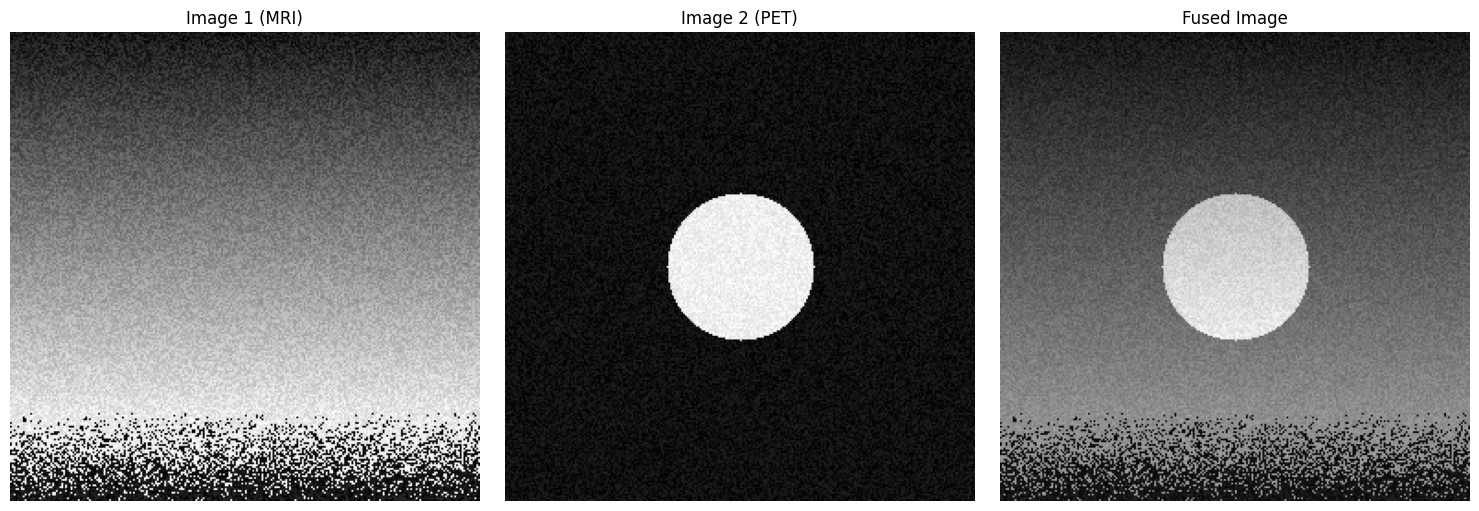

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt

# --- 1. Data Simulation (Mock Medical Images) ---
IMAGE_SIZE = 256
MAX_PIXEL_VALUE = 255.0

print("Simulating two multimodal medical images (e.g., MRI and PET)...")

# Image 1 (MRI-like): gradient + noise
I1 = np.indices((IMAGE_SIZE, IMAGE_SIZE))[0] / IMAGE_SIZE
I1 = (I1 * 255).astype(np.uint8)
I1 = I1 + np.random.randint(0, 50, (IMAGE_SIZE, IMAGE_SIZE), dtype=np.uint8)
I1 = np.clip(I1, 0, MAX_PIXEL_VALUE)

# Image 2 (PET-like): bright circular region + noise
center = IMAGE_SIZE // 2
radius = 40
I2 = np.zeros((IMAGE_SIZE, IMAGE_SIZE), dtype=np.uint8)
Y, X = np.ogrid[:IMAGE_SIZE, :IMAGE_SIZE]
mask = (X - center)**2 + (Y - center)**2 <= radius**2
I2[mask] = 200
I2 = I2 + np.random.randint(0, 30, (IMAGE_SIZE, IMAGE_SIZE), dtype=np.uint8)
I2 = np.clip(I2, 0, MAX_PIXEL_VALUE)

# Convert to float
I1_float = I1.astype(np.float32)
I2_float = I2.astype(np.float32)

# --- 2. Image Fusion (Averaging) ---
print("\nFusing images using simple averaging...")
I_fused_float = (I1_float + I2_float) / 2.0
I_fused = np.clip(I_fused_float, 0, MAX_PIXEL_VALUE).astype(np.uint8)

# --- 3. Evaluation Metrics ---

def calculate_mse(image_a, image_b):
    """Mean Squared Error"""
    return np.mean((image_a.astype("float") - image_b.astype("float")) ** 2)

def calculate_rmse(mse):
    """Root Mean Squared Error"""
    return sqrt(mse)

def calculate_psnr(image_a, image_b, max_pixel=MAX_PIXEL_VALUE):
    """Peak Signal-to-Noise Ratio (dB)"""
    mse = calculate_mse(image_a, image_b)
    if mse == 0:
        return 100  # perfect match
    return 10 * log10((max_pixel ** 2) / mse)

# --- 4. Comparative Analysis (Original vs Fused) ---

# Image 1 vs Fused
mse_1f = calculate_mse(I1, I_fused)
rmse_1f = calculate_rmse(mse_1f)
psnr_1f = calculate_psnr(I1, I_fused)

# Image 2 vs Fused
mse_2f = calculate_mse(I2, I_fused)
rmse_2f = calculate_rmse(mse_2f)
psnr_2f = calculate_psnr(I2, I_fused)

# --- Print Results ---
print("\n--- Comparative Analysis ---")

print("\nImage 1 (MRI) vs Fused:")
print(f"  MSE : {mse_1f:.4f}")
print(f"  RMSE: {rmse_1f:.4f}")
print(f"  PSNR: {psnr_1f:.4f} dB")

print("\nImage 2 (PET) vs Fused:")
print(f"  MSE : {mse_2f:.4f}")
print(f"  RMSE: {rmse_2f:.4f}")
print(f"  PSNR: {psnr_2f:.4f} dB")

# --- 5. Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Image 1 (MRI)', 'Image 2 (PET)', 'Fused Image']
images = [I1, I2, I_fused]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

Simulating multimodal images (MRI + PET)...
Fusing images by averaging...

MRI vs Fused
MSE : 107.6860
RMSE: 10.3772
PSNR: 27.8092 dB

PET vs Fused
MSE : 108.5843
RMSE: 10.4204
PSNR: 27.7731 dB


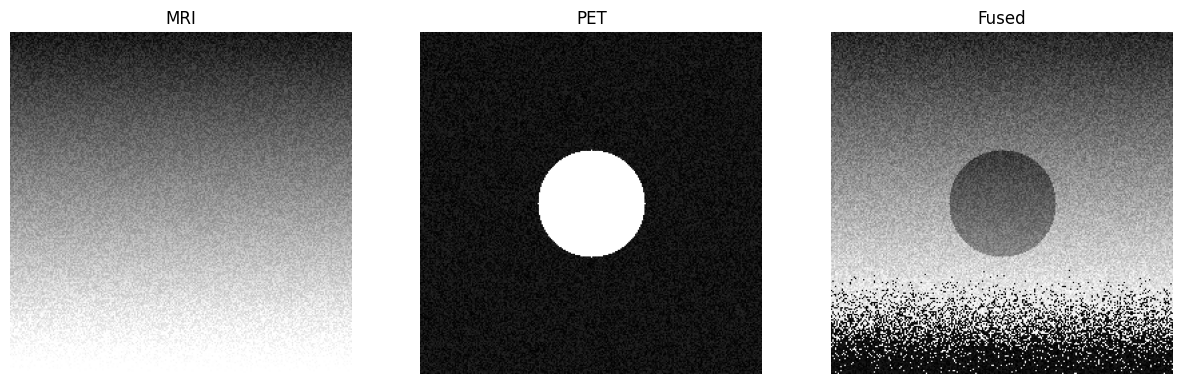

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt

# ------------------ 1. Create Mock Images ------------------
IMAGE_SIZE = 256
MAX_PIXEL = 255

print("Simulating multimodal images (MRI + PET)...")

# MRI-like image (gradient + noise)
I1 = np.indices((IMAGE_SIZE, IMAGE_SIZE))[0]
I1 = np.clip(I1 + np.random.randint(0, 50, I1.shape), 0, MAX_PIXEL).astype(np.uint8)

# PET-like image (bright circle + noise)
Y, X = np.ogrid[:IMAGE_SIZE, :IMAGE_SIZE]
center, radius = IMAGE_SIZE // 2, 40
mask = (X - center)**2 + (Y - center)**2 <= radius**2
I2 = np.random.randint(0, 30, (IMAGE_SIZE, IMAGE_SIZE))
I2[mask] = 200
I2 = np.clip(I2, 0, MAX_PIXEL).astype(np.uint8)

# ------------------ 2. Fusion (Average) ------------------
print("Fusing images by averaging...")
I_fused = ((I1 + I2) / 2).astype(np.uint8)

# ------------------ 3. Metrics ------------------
def mse(a, b): return np.mean((a - b) ** 2)
def rmse(v): return sqrt(v)
def psnr(a, b, maxv=MAX_PIXEL):
    m = mse(a, b)
    return 100 if m == 0 else 10 * log10((maxv**2) / m)

# MRI vs Fused
m1 = mse(I1, I_fused)
print("\nMRI vs Fused")
print(f"MSE : {m1:.4f}")
print(f"RMSE: {rmse(m1):.4f}")
print(f"PSNR: {psnr(I1, I_fused):.4f} dB")

# PET vs Fused
m2 = mse(I2, I_fused)
print("\nPET vs Fused")
print(f"MSE : {m2:.4f}")
print(f"RMSE: {rmse(m2):.4f}")
print(f"PSNR: {psnr(I2, I_fused):.4f} dB")

# ------------------ 4. Display ------------------
plt.figure(figsize=(15,5))
for i, (img, title) in enumerate([(I1,"MRI"),(I2,"PET"),(I_fused,"Fused")]):
    plt.subplot(1,3,i+1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
plt.show()
